# Creating a predictive model from our world in data.
Data from [Our world in Data](https://github.com/owid/co2-data?tab=readme-ov-file)

In [58]:
import pandas as pd

df = pd.read_csv("owid-co2-data.csv")

# Create a folder to store plots
import os
os.makedirs("plots", exist_ok=True)

In [59]:
# Check the shape of the dataset
df.shape

(50191, 79)

In [60]:
# Check the first rows of the dataset
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [62]:
# Check how many missing values each column has
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

iso_code                        7929
population                      9172
gdp                            34940
cement_co2                     21328
cement_co2_per_capita          24833
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 77, dtype: int64


In [63]:
df.columns.tolist()

['country',
 'year',
 'iso_code',
 'population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_growth_abs',
 'co2_growth_prct',
 'co2_including_luc',
 'co2_including_luc_growth_abs',
 'co2_including_luc_growth_prct',
 'co2_including_luc_per_capita',
 'co2_including_luc_per_gdp',
 'co2_including_luc_per_unit_energy',
 'co2_per_capita',
 'co2_per_gdp',
 'co2_per_unit_energy',
 'coal_co2',
 'coal_co2_per_capita',
 'consumption_co2',
 'consumption_co2_per_capita',
 'consumption_co2_per_gdp',
 'cumulative_cement_co2',
 'cumulative_co2',
 'cumulative_co2_including_luc',
 'cumulative_coal_co2',
 'cumulative_flaring_co2',
 'cumulative_gas_co2',
 'cumulative_luc_co2',
 'cumulative_oil_co2',
 'cumulative_other_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'flaring_co2',
 'flaring_co2_per_capita',
 'gas_co2',
 'gas_co2_per_capita',
 'ghg_excluding_lucf_per_capita',
 'ghg_per_capita',
 'land_use_change_co2',
 'land_use_change_co2_per_capita',
 'methane',
 'methane_per_capita',
 

In [64]:
# Drop columns with >95% missing values
threshold = 0.95
df = df.loc[:, df.isnull().mean() < threshold]

# Keep rows that have at least 1 non-null value beyond the ID fields
# Optionally exclude identifier columns from this check
id_cols = ['country', 'year', 'iso_code']
df = df[df.drop(columns=id_cols).notnull().sum(axis=1) > 0]

# Sort by country and year for proper forward fill
df = df.sort_values(by=['country', 'year'])

# Fill missing values by country using forward fill
# df = df.groupby('country').ffill()
# # Reset index to bring 'country' back as a column
# df = df.reset_index()

# # Backward fill
# df = df.groupby('country').bfill()

df = df.groupby('country').apply(lambda group: group.ffill().bfill()).reset_index(drop=True)

# Fill any remaining NaNs with the column median (numeric only)
df = df.fillna(df.median(numeric_only=True))

# Check again if any missing values remain
print(df.isnull().sum().sort_values(ascending=False))

/tmp/ipython-input-64-638954053.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.groupby('country').apply(lambda group: group.ffill().bfill()).reset_index(drop=True)


iso_code                       7929
country                           0
year                              0
population                        0
gdp                               0
                               ... 
temperature_change_from_n2o       0
total_ghg                         0
total_ghg_excluding_lucf          0
trade_co2                         0
trade_co2_share                   0
Length: 76, dtype: int64


/tmp/ipython-input-64-638954053.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('country').apply(lambda group: group.ffill().bfill()).reset_index(drop=True)


In [93]:
# Check the shape of the dataset
df.shape

(46629, 76)

In [65]:
# Save the Cleaned Data
from google.colab import files
df.to_csv('cleaned_owid-co2-data.csv', index=False)
files.download('cleaned_owid-co2-data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualising the data

In [66]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('Categorical Columns:', categorical_cols)
print('Numerical Columns:', numerical_cols)

Categorical Columns: ['country', 'iso_code']
Numerical Columns: ['year', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nit

In [67]:
selected_columns = [
    'co2',                    # target
    'gdp',
    'population',
    'primary_energy_consumption',
    'energy_per_capita',
    'coal_co2',
    'oil_co2',
    'gas_co2',
    'cement_co2'
]


In [68]:
df_recent = df[df['year'] >= 1990][selected_columns].dropna()

df[selected_columns].describe()

,co2,gdp,population,primary_energy_consumption,energy_per_capita,coal_co2,oil_co2,gas_co2,cement_co2
count,50191.00000,5.019100e+04,5.019100e+04,50191.000000,50191.000000,50191.000000,50191.000000,50191.000000,50191.000000
mean,241.93686,1.624955e+11,5.376245e+07,1264.057798,17084.076527,80.004330,58.372424,26.434549,4.514577
std,1496.61375,2.286720e+12,3.018286e+08,6497.356049,25099.443619,562.049735,460.891357,237.862267,47.618982
min,0.00000,4.998000e+07,2.150000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.02200,4.745218e+09,2.933790e+05,4.729000,2475.974500,0.004000,0.007000,0.000000,0.000000
50%,0.39100,8.747385e+09,1.995399e+06,29.387000,6944.599000,0.070000,0.148000,0.000000,0.000000
75%,10.13800,1.814940e+10,7.795051e+06,121.847000,23099.750000,1.242000,1.733000,0.007000,0.127000
max,37791.57000,1.301126e+14,8.091735e+09,172119.062000,317576.594000,15401.220000,12411.968000,7922.980000,1696.308000


## Visualising the data

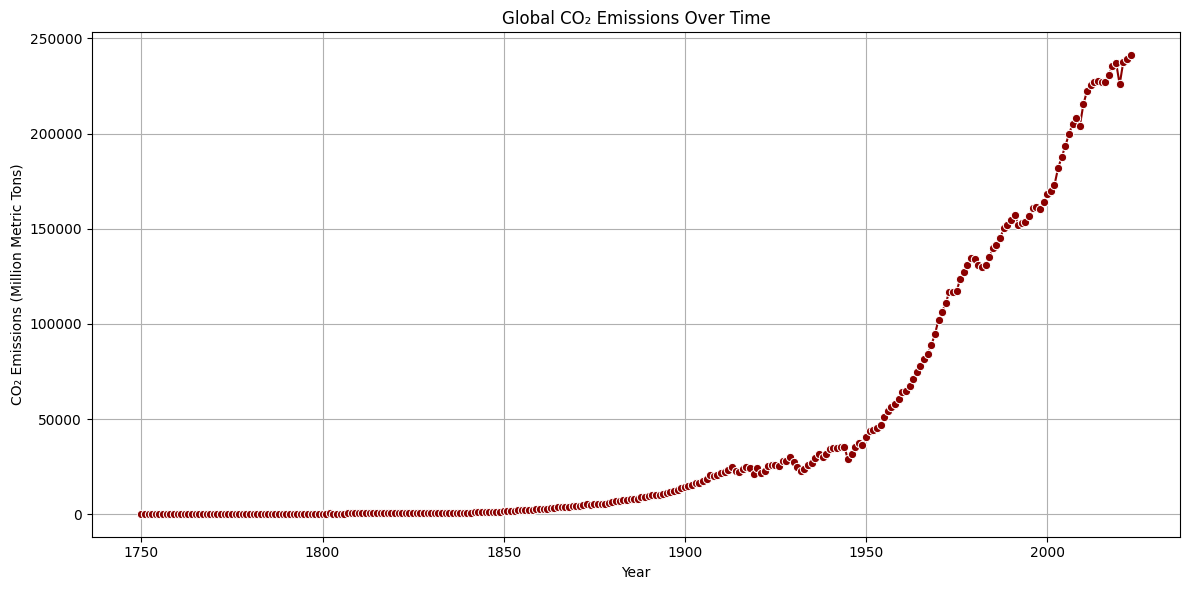

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum CO₂ by year
df_yearly = df_recent.copy()
df_yearly['year'] = df[df['year'] >= 1990]['year']  # ensure 'year' exists
yearly = pd.concat([df['year'], df[selected_columns]], axis=1)
yearly = yearly.dropna()
yearly_total = yearly.groupby('year')['co2'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_total, x='year', y='co2', marker='o', color='darkred')
plt.title("Global CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/global_co2_Emissions_Over_Time.png")
plt.show()

In [70]:
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Create dropdown for country selection
country_dropdown = widgets.Dropdown(
    options=sorted(df['country'].dropna().unique()),
    description='Country:',
    value='Ghana'
)

def plot_country_co2(country):
    country_df = df[df['country'] == country][['year', 'co2']].dropna()
    plt.figure(figsize=(10, 5))
    plt.plot(country_df['year'], country_df['co2'], marker='o', color='green')
    plt.title(f'CO₂ Emissions for {country}')
    plt.xlabel('Year')
    plt.ylabel('CO₂ Emissions (Mt)')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("plots/Co2 Emissions for {country}.png")
    plt.show()

widgets.interact(plot_country_co2, country=country_dropdown)

interactive(children=(Dropdown(description='Country:', index=89, options=('Afghanistan', 'Africa', 'Africa (GC…

<function __main__.plot_country_co2(country)>

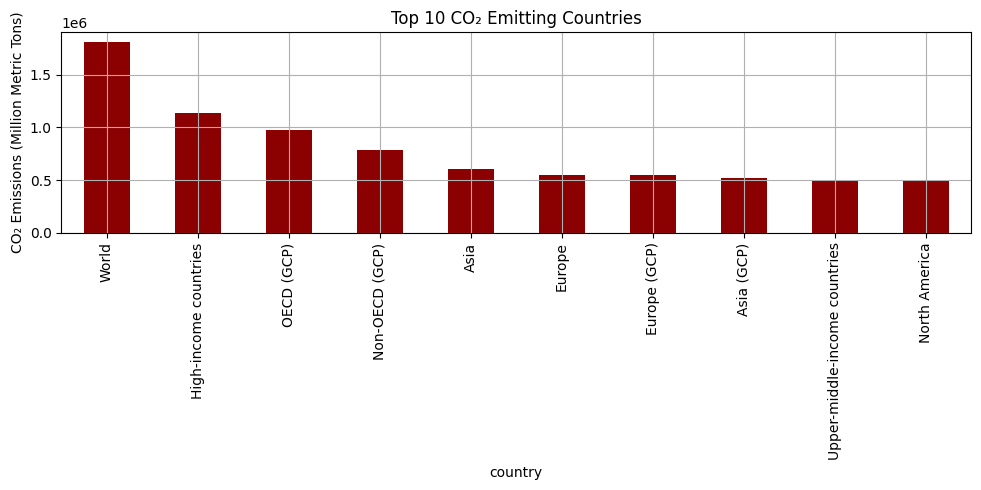

In [71]:
# Country-level Emissions
top_countries = df.groupby(df['country'])['co2'].sum().nlargest(10)
top_countries.plot(kind='bar', color='darkred', figsize=(10,5))
plt.title('Top 10 CO₂ Emitting Countries')
plt.ylabel('CO₂ Emissions (Million Metric Tons)')
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/Top 10 CO₂ Emitting Countries.png")
plt.show()

## Correlation Heatmap between features

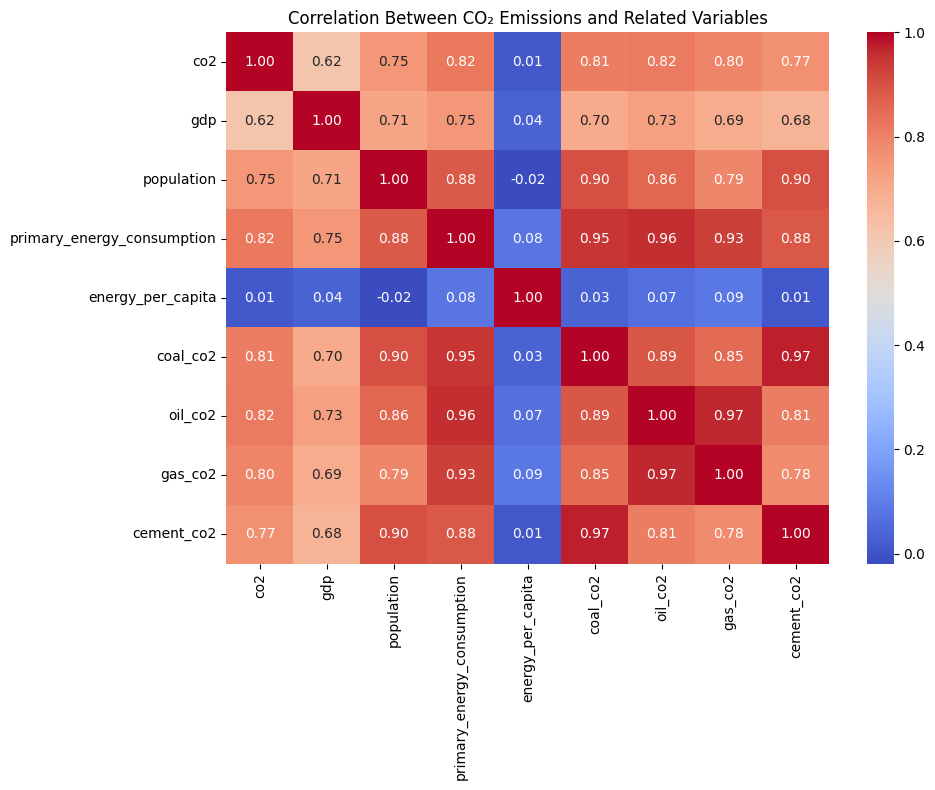

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_recent.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between CO₂ Emissions and Related Variables")
plt.tight_layout()
plt.savefig("plots/Correlation Between CO₂ Emissions and Related Variables.png")
plt.show()


##  Scatter Plot: GDP vs CO₂ Emissions

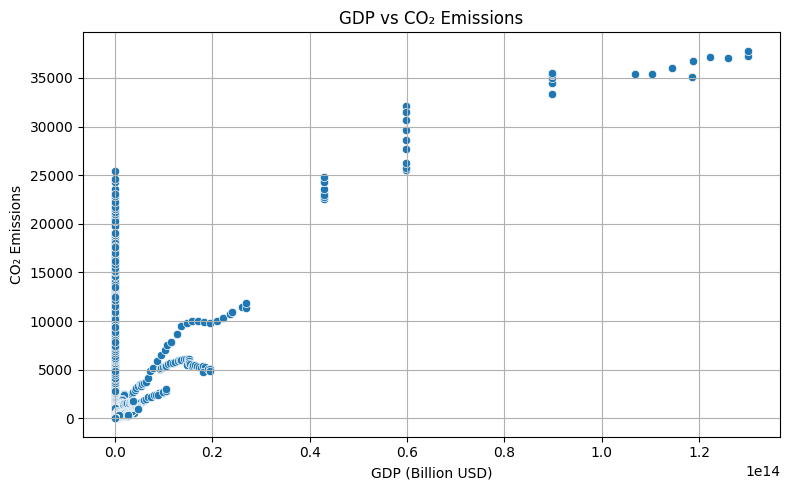

In [73]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_recent, x='gdp', y='co2')
plt.title("GDP vs CO₂ Emissions")
plt.xlabel("GDP (Billion USD)")
plt.ylabel("CO₂ Emissions")
plt.grid(True)
plt.tight_layout()
plt.savefig("plots/GDP vs CO₂ Emissions.png")
plt.show()


# Building the regression Model

In [74]:
from sklearn.model_selection import train_test_split

X = df_recent.drop(columns=['co2'])  # Features
y = df_recent['co2']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training the model

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

# Evaluating the model

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 340.59
RMSE: 1440.19
R² Score: 0.82


***end***

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Seed for reproducibility
np.random.seed(42)

# Select features
selected_columns = [
    'co2',
    'gdp',
    'population',
    'primary_energy_consumption',
    'coal_co2',
    'oil_co2',
    'gas_co2',
    'cement_co2'
]

df_recent = df[df['year'] >= 1990][selected_columns].dropna()

X = df_recent.drop(columns=['co2'])
y = df_recent['co2']

# Log-transform
X_log = X.copy()
for col in ['gdp', 'population', 'primary_energy_consumption']:
    X_log[col] = np.log1p(X_log[col])

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_log)

# Scaling
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Train-test split with fixed seed
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_scaled, y, test_size=0.2, random_state=42
)

# RandomForest Regressor with fixed seed
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
r2 = r2_score(y_test, rf_pred)

print("\n=== RandomForest Regressor ===")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score (Test Accuracy): {r2*100:.2f}%")



=== RandomForest Regressor ===
MAE: 309.59
RMSE: 1438.23
R² Score (Test Accuracy): 82.11%



=== HISTORICAL CO2 DATA ===
     year        co2
240  1990  79,211.10
241  1991  80,738.20
242  1992  77,426.46
243  1993  77,799.07
244  1994  77,946.89
245  1995  79,433.34
246  1996  81,577.08
247  1997  81,803.27
248  1998  81,300.61
249  1999  83,084.78
250  2000  85,286.91
251  2001  86,122.10
252  2002  87,872.75
253  2003  92,380.69
254  2004  95,372.77
255  2005  98,427.73
256  2006 101,710.21
257  2007 104,480.31
258  2008 106,201.74
259  2009 104,272.16
260  2010 110,220.23
261  2011 113,973.88
262  2012 115,789.15
263  2013 116,511.34
264  2014 116,846.77
265  2015 116,701.35
266  2016 116,814.23
267  2017 118,712.42
268  2018 121,083.31
269  2019 122,306.58
270  2020 116,565.25
271  2021 122,530.22
272  2022 123,329.88
273  2023 124,651.34

=== PREDICTED CO2 DATA ===
    year        co2
0   2024 129,004.51
1   2025 130,630.85
2   2026 132,257.18
3   2027 133,883.52
4   2028 135,509.85
5   2029 137,136.19
6   2030 138,762.52
7   2031 140,388.86
8   2032 142,015.19
9   2033

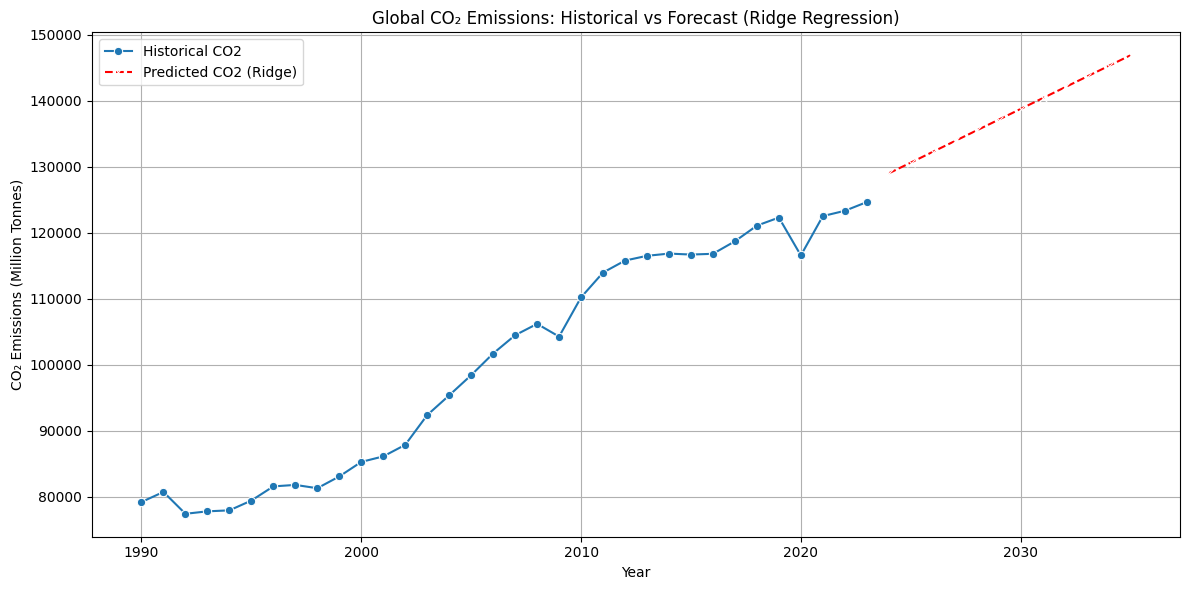

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

# ================================
# PART 1: SETUP AND DATA LOADING
# ================================

# Suppress all warnings to clean output
warnings.filterwarnings("ignore")

# Try to load the dataset
try:
    df = pd.read_csv("owid-co2-data.csv")
except FileNotFoundError:
    print("Error: File 'owid-co2-data.csv' not found.")
    exit()

# ================================
# PART 2: DATA PREPROCESSING
# ================================

# Remove regions/continents to keep only countries
non_countries = ['World', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania',
                 'High-income countries', 'Low-income countries', 'Lower-middle-income countries',
                 'Upper-middle-income countries', 'European Union (27)', 'European Union (28)']
df = df[~df['country'].isin(non_countries)]

# Remove columns with >95% missing values
threshold = 0.95
df = df.loc[:, df.isnull().mean() < threshold]

# Drop rows where all non-ID columns are missing
id_cols = ['country', 'year', 'iso_code']
df = df.dropna(subset=df.columns.difference(id_cols), how='all')

# Sort data
df = df.sort_values(by=['country', 'year'])

# Fill missing numeric data per country (forward & backward fill)
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df.groupby('country')[numeric_cols].transform(lambda group: group.ffill().bfill())

# Fill remaining missing values with median
df = df.fillna(df.median(numeric_only=True))

# ================================
# PART 3: GLOBAL CO2 DATA
# ================================

# Aggregate CO2 per year globally
df_global = df.groupby('year')[['co2']].sum().reset_index()

# Use data from 1990 onwards
df_global = df_global[df_global['year'] >= 1990].dropna()

# ================================
# PART 4: TRAIN RIDGE MODEL
# ================================

# Input and target
X_global = df_global[['year']]
y_global = df_global['co2']

# Pipeline: scaling + Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

# Train the model
pipeline.fit(X_global, y_global)

# ================================
# PART 5: PREDICT FUTURE CO2
# ================================

# Create future years (next up to 2035)
future_years = np.arange(df_global['year'].max() + 1, 2036)
future_X = pd.DataFrame({'year': future_years})

# Predict future CO2 emissions
future_predictions = pipeline.predict(future_X)

# Put predictions into dataframe
future_forecast_df = pd.DataFrame({
    'year': future_years,
    'co2': future_predictions
})

# ================================
# PART 6: PRINT OUTPUT
# ================================

print("\n=== HISTORICAL CO2 DATA ===")
print(df_global[['year', 'co2']])

print("\n=== PREDICTED CO2 DATA ===")
print(future_forecast_df[['year', 'co2']])

# ================================
# PART 7: PLOT THE RESULTS
# ================================

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_global, x='year', y='co2', label='Historical CO2', marker='o')
sns.lineplot(data=future_forecast_df, x='year', y='co2', label='Predicted CO2 (Ridge)', marker='x', color='red', linestyle='--')

plt.title("Global CO₂ Emissions: Historical vs Forecast (Ridge Regression)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Tonnes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
# prompt: Policy Insights and Recommendations

# ### Policy Insights and Recommendations

print("\nPolicy Insights and Recommendations:")

# Based on the analysis and forecasting, here are some policy insights:
print("\nBased on the analysis and forecasting:")

# 1. The forecast shows a projected increase in global CO₂ emissions up to 2035 based on current trends. This indicates that current efforts are not sufficient to curb emissions and stronger policies are needed.
print("- The forecast shows a projected increase in global CO₂ emissions up to 2035 based on current trends. This indicates that current efforts are not sufficient to curb emissions and stronger policies are needed.")

# 2. The strong correlation between GDP and CO₂ emissions suggests that economic growth is currently linked to increased emissions. Policies should aim to decouple this relationship, promoting green growth strategies.
print("- The strong correlation between GDP and CO₂ emissions suggests that economic growth is currently linked to increased emissions. Policies should aim to decouple this relationship, promoting green growth strategies.")

# 3. Fossil fuels (coal, oil, gas) remain major contributors to CO₂ emissions based on their strong correlations. Accelerating the transition to renewable energy sources is crucial.
print("- Fossil fuels (coal, oil, gas) remain major contributors to CO₂ emissions based on their strong correlations. Accelerating the transition to renewable energy sources is crucial.")

# 4. Population and energy consumption per capita also show positive correlations with CO₂ emissions. Sustainable consumption patterns and energy efficiency measures are important alongside energy source shifts.
print("- Population and energy consumption per capita also show positive correlations with CO₂ emissions. Sustainable consumption patterns and energy efficiency measures are important alongside energy source shifts.")

# Recommendations:
print("\nRecommendations:")

# - **Invest in Renewable Energy:** Implement policies and incentives to significantly increase the share of solar, wind, and other renewable energy sources in the energy mix.
print("- **Invest in Renewable Energy:** Implement policies and incentives to significantly increase the share of solar, wind, and other renewable energy sources in the energy mix.")

# - **Carbon Pricing Mechanisms:** Introduce or strengthen carbon taxes or cap-and-trade systems to make emitting carbon more expensive and incentivize cleaner alternatives.
print("- **Carbon Pricing Mechanisms:** Introduce or strengthen carbon taxes or cap-and-trade systems to make emitting carbon more expensive and incentivize cleaner alternatives.")

# - **Energy Efficiency Standards:** Implement stricter energy efficiency standards for buildings, vehicles, and industrial processes.
print("- **Energy Efficiency Standards:** Implement stricter energy efficiency standards for buildings, vehicles, and industrial processes.")

# - **Support Green Innovation:** Fund research and development in carbon capture technologies, sustainable fuels, and other innovative solutions.
print("- **Support Green Innovation:** Fund research and development in carbon capture technologies, sustainable fuels, and other innovative solutions.")

# - **International Cooperation:** Foster international agreements and collaborations to share technology, provide financial support to developing countries, and ensure a globally coordinated effort.
print("- **International Cooperation:** Foster international agreements and collaborations to share technology, provide financial support to developing countries, and ensure a globally coordinated effort.")

# - **Promote Sustainable Consumption:** Educate the public and encourage behavioral changes towards more sustainable consumption and transportation choices.
print("- **Promote Sustainable Consumption:** Educate the public and encourage behavioral changes towards more sustainable consumption and transportation choices.")

# - **Review and Update Policies Regularly:** Continuously monitor emissions trends and the effectiveness of implemented policies, adjusting strategies as needed to meet climate goals.
print("- **Review and Update Policies Regularly:** Continuously monitor emissions trends and the effectiveness of implemented policies, adjusting strategies as needed to meet climate goals.")


Policy Insights and Recommendations:

Based on the analysis and forecasting:
- The forecast shows a projected increase in global CO₂ emissions up to 2035 based on current trends. This indicates that current efforts are not sufficient to curb emissions and stronger policies are needed.
- The strong correlation between GDP and CO₂ emissions suggests that economic growth is currently linked to increased emissions. Policies should aim to decouple this relationship, promoting green growth strategies.
- Fossil fuels (coal, oil, gas) remain major contributors to CO₂ emissions based on their strong correlations. Accelerating the transition to renewable energy sources is crucial.
- Population and energy consumption per capita also show positive correlations with CO₂ emissions. Sustainable consumption patterns and energy efficiency measures are important alongside energy source shifts.

Recommendations:
- **Invest in Renewable Energy:** Implement policies and incentives to significantly increas